# point

# point2

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("housing_price_dataset.csv")
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [3]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

C:\Users\saro1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


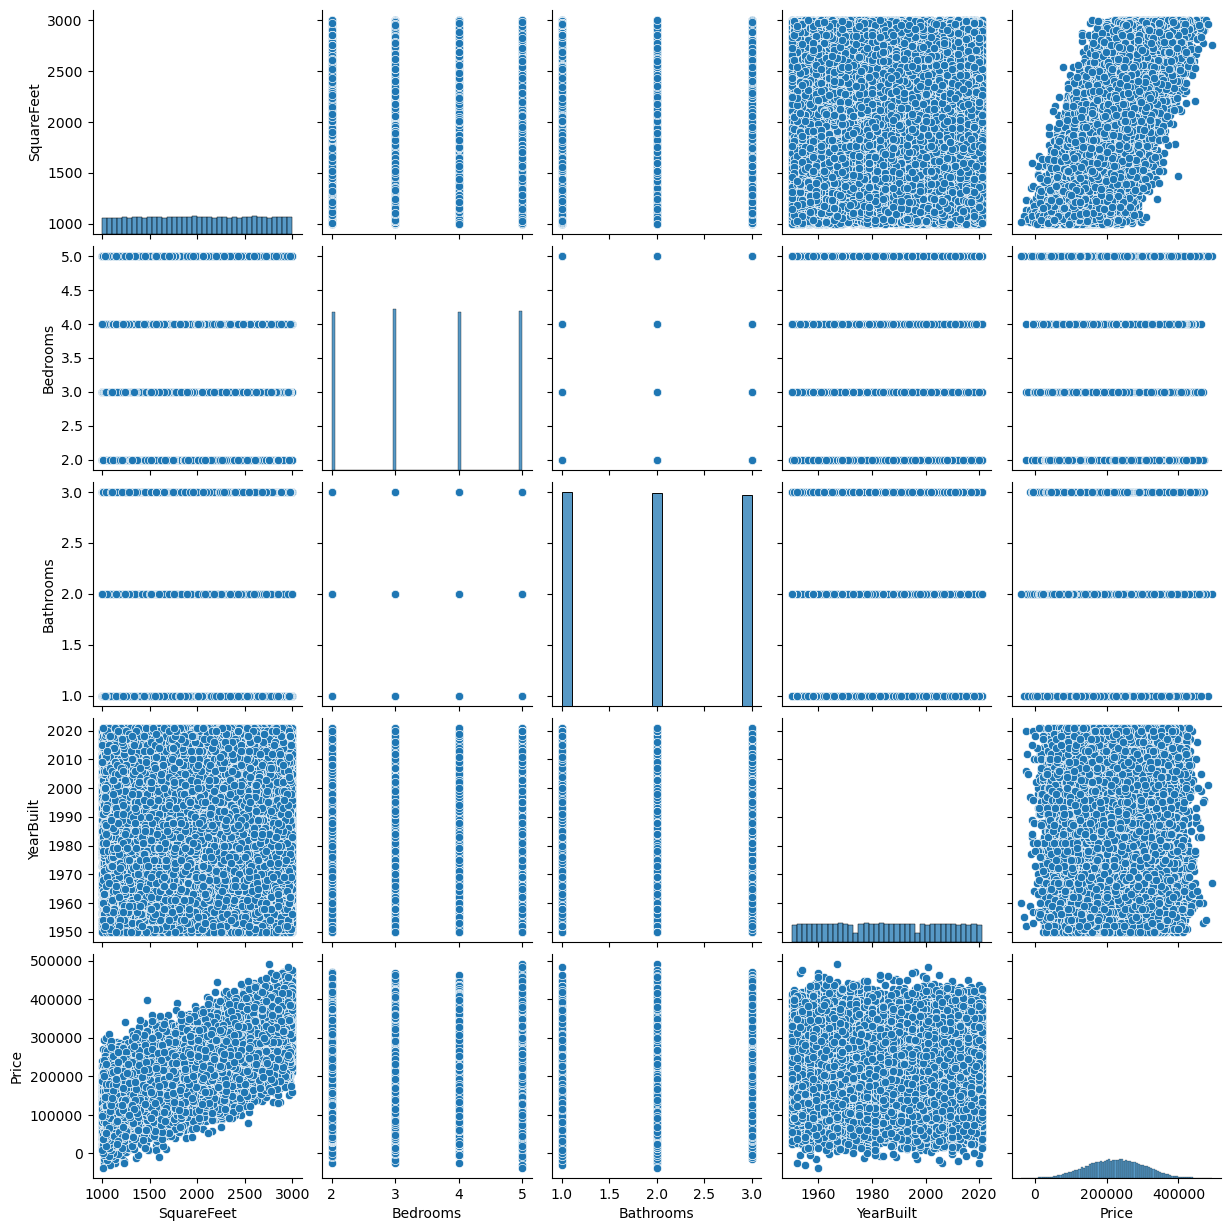

In [4]:
sns.pairplot(df)

<Axes: xlabel='SquareFeet', ylabel='Price'>

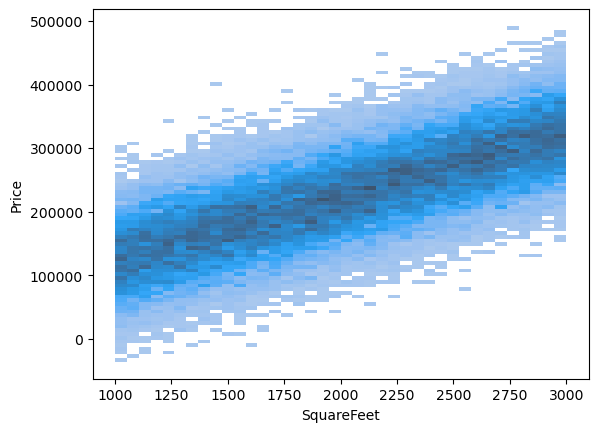

In [5]:
sns.histplot(df,x='SquareFeet',y='Price')

<Axes: xlabel='Bedrooms', ylabel='Price'>

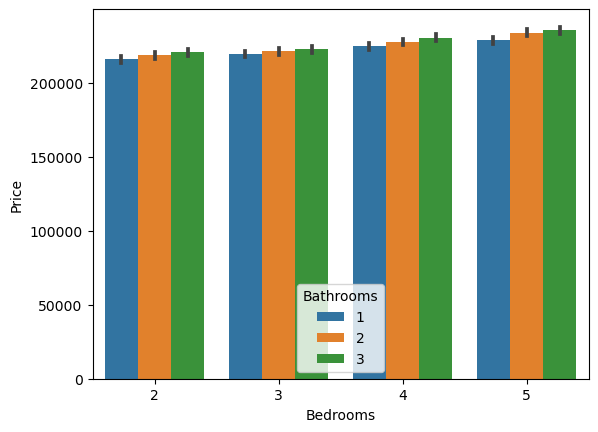

In [6]:
sns.barplot(df,x='Bedrooms',y='Price',hue='Bathrooms')

<Axes: xlabel='Bedrooms', ylabel='Price'>

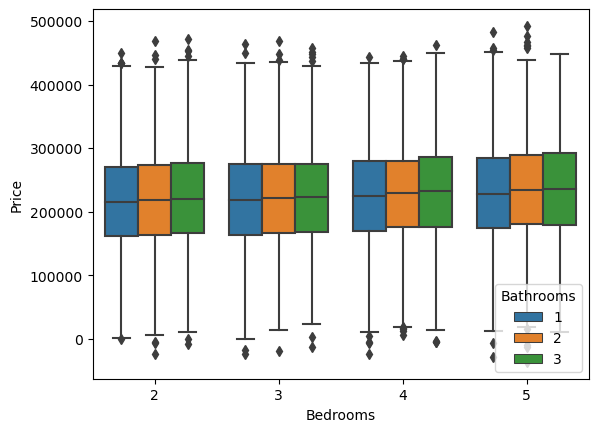

In [7]:
sns.boxplot(df,x='Bedrooms',y='Price',hue='Bathrooms')

<Axes: xlabel='Bedrooms', ylabel='Price'>

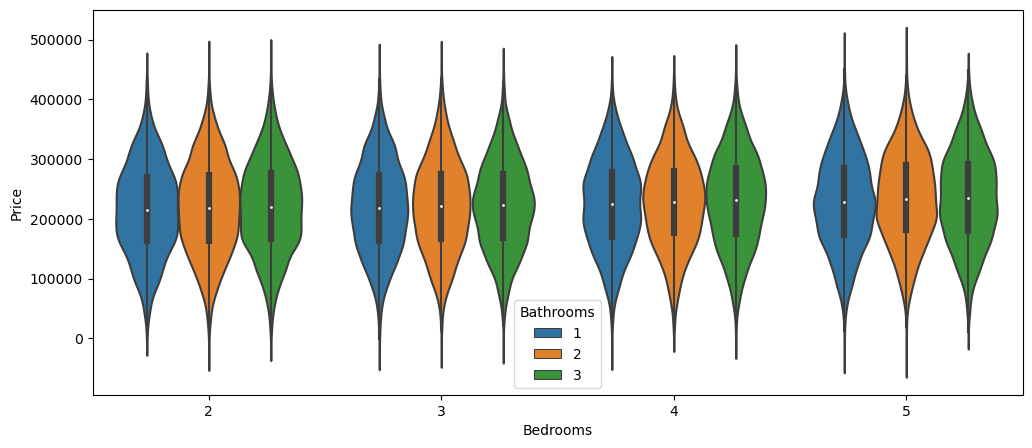

In [8]:
plt.figure(figsize=(12,5))
sns.violinplot(df,x='Bedrooms',y='Price',hue='Bathrooms')

<Axes: xlabel='Bedrooms', ylabel='Price'>

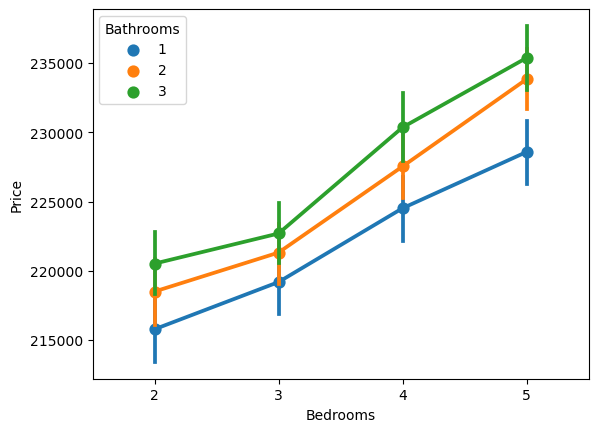

In [9]:
sns.pointplot(df,x='Bedrooms',y='Price',hue='Bathrooms')

<Axes: xlabel='Neighborhood', ylabel='Price'>

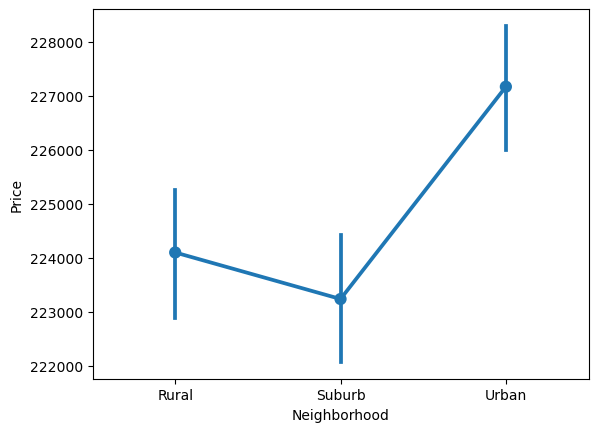

In [10]:
sns.pointplot(df,x='Neighborhood',y='Price')

In [11]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [12]:
df['Neighborhood'].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [13]:
# Rural=0 / Suburb=1 / Urban=2로 변환
mapping={'Rural':0, 'Suburb':1, 'Urban':2}
df['Neighborhood']=df['Neighborhood'].map(mapping)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957


In [14]:
X=df.drop(['Price'],axis=1)
X

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2126,4,1,0,1969
1,2459,3,2,0,1980
2,1860,2,1,1,1970
3,2294,2,1,2,1996
4,2130,5,2,1,2001
...,...,...,...,...,...
49995,1282,5,3,0,1975
49996,2854,2,2,1,1988
49997,2979,5,3,1,1962
49998,2596,5,2,0,1984


In [15]:
y=df['Price']
y

0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
49998    380512.685957
49999    221618.583218
Name: Price, Length: 50000, dtype: float64

In [16]:
# MinMaxScaler는 각 특성의 값을 0 or 1로 변환한다.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.56328164, 0.66666667, 0.        , 0.        , 0.26760563],
       [0.72986493, 0.33333333, 0.5       , 0.        , 0.42253521],
       [0.43021511, 0.        , 0.        , 0.5       , 0.28169014],
       ...,
       [0.989995  , 1.        , 1.        , 0.5       , 0.16901408],
       [0.7983992 , 1.        , 0.5       , 0.        , 0.47887324],
       [0.28614307, 1.        , 1.        , 0.        , 0.85915493]])

In [17]:
scaler.data_max_

array([2.999e+03, 5.000e+00, 3.000e+00, 2.000e+00, 2.021e+03])

In [18]:
scaler.data_min_

array([1.00e+03, 2.00e+00, 1.00e+00, 0.00e+00, 1.95e+03])

In [19]:
print(X_scaled[:,0])

[0.56328164 0.72986493 0.43021511 ... 0.989995   0.7983992  0.28614307]


In [20]:
y.shape

(50000,)

In [21]:
X.shape

(50000, 5)

In [22]:
y

0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
49998    380512.685957
49999    221618.583218
Name: Price, Length: 50000, dtype: float64

In [23]:
y=y.values.reshape(-1,1)
y

array([[215355.2836182 ],
       [195014.22162585],
       [306891.01207633],
       ...,
       [384110.55559035],
       [380512.68595684],
       [221618.58321807]])

In [24]:
y_scaled=scaler.fit_transform(y)
y

array([[215355.2836182 ],
       [195014.22162585],
       [306891.01207633],
       ...,
       [384110.55559035],
       [380512.68595684],
       [221618.58321807]])

### model training

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y_scaled)

In [26]:
X_train.shape

(37500, 5)

In [27]:
X_test.shape

(12500, 5)

In [28]:
y_train.shape

(37500, 1)

In [29]:
import tensorflow.keras
# Neural Network 모델을 구축할 때 사용함
from keras.models import Sequential
# ANN을 구출할 때 사용 /밀집층 Dense layer(Fully connected layer)
from keras.layers import Dense
model=Sequential()
model.add(Dense(25,input_dim=5,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='linear'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826 (3.23 KB)
Trainable params: 826 (3.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(optimizer='adam',loss='mse')

In [32]:
epochs=model.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/20

59/59 [==============================] - 2s 7ms/step - loss: 0.0200 - val_loss: 0.0105
Epoch 2/20
59/59 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.0097
Epoch 3/20
59/59 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 4/20
59/59 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 5/20
59/59 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/20
59/59 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/20
59/59 [==============================] - 0s 4ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 8/20
59/59 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 9/20
59/59 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 10/20
59/59 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 11/20
59/59 

In [33]:
print(epochs.history.keys())

dict_keys(['loss', 'val_loss'])


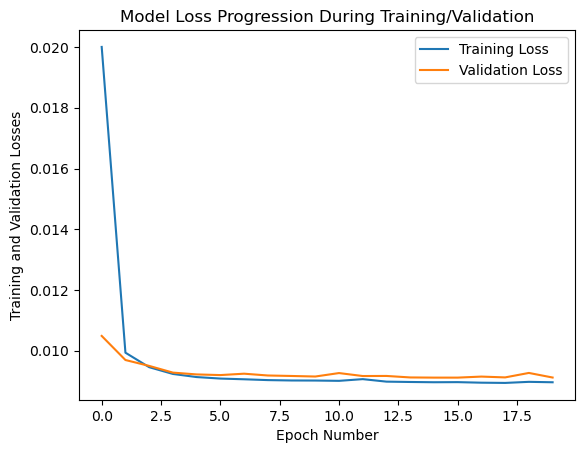

In [34]:

# 손실 그래프를 그립니다.
plt.plot(epochs.history['loss'], label='Training Loss')
plt.plot(epochs.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

# 그래프를 표시합니다.
plt.show()

In [35]:
df.head(2)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626


In [36]:
Test=np.array([[2459,3,2,0,1980]])
y_predict=model.predict(Test)
y_predict.shape

1/1 [==============================] - 0s 144ms/step


(1, 1)

In [37]:
print(y_predict)

[[926.82983]]
